AI-ML @ ENSPIMA / v1.3 september 2025 / Jean-Luc CHARLES (Jean-Luc.charles@mailo.com) / CC BY-SA 4.0

<div class="alert alert-block alert-info"> 
<span style="color: #0000BB;font-weight: bold; font-size:large;">
    Copy this notebook in the <i>Notebooks</i> directory if you want to use it...
</span></div>

# Wake up your Python! part 2
<span style="font-size:large;">
1 - <span style="color:green">ndarray</span>: the multi-dimensional array of the module <span style="color:green">numpy</span><br>
2 - Conversion "<span style="color:green">list</span> <-> <span style="color:green">ndarray</span> of <span style="color:green">numpy</span>"<br>
3 - Reading ASCII files $-$ Encoding<br>
4 - Disk tree manipulation: the `os` module<br>
5 - Reading image files<br>
6 - Drawing curves with `matplolib`
</span>

<br>
<div class="alert alert-block alert-danger"> <span style="color:#000080">
<span style="font-weight: bold;font-size:large;"> Before proceeding to the exercises:</span><br>
<span style="font-size:large;">
- Read carefully all the explanations and execute the Python given cells with $\mathtt{Shift+Enter}$.<br>
- Note that the value of the last line of a Notebook cell is always displayed below the cell.
</span></div>

## 1 - **ndarray**: the multi-dimensional array of the module **numpy**

The <span style="color:green">ndarray</span> class (n-dimensional array) of the 
<span style="color:green">numpy</span> module is used to create **vectors**, **matrices**... and to do efficient [linear algebra](https://numpy.org/doc/stable/reference/routines.linalg.html) computing.

In [1]:
import numpy as np

Creates a 3x3 matrix filled with 0:

In [2]:
M = np.zeros((3,3))  

Note the difference between *displaying* M (last line of a cell) and *printing* M with the <span style="color:green">print</span> function:

In [3]:
M

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [4]:
print(M)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Elementary matrix manipulation:

In [5]:
M + 10

array([[10., 10., 10.],
       [10., 10., 10.],
       [10., 10., 10.]])

In [6]:
10*np.ones((3,3))  

array([[10., 10., 10.],
       [10., 10., 10.],
       [10., 10., 10.]])

In [7]:
for row in range(3):
    for col in range(3):
        M[row, col] = col + row*10
print(M)     

[[ 0.  1.  2.]
 [10. 11. 12.]
 [20. 21. 22.]]


Convert a list in vector with the numpy.array method:

In [8]:
V1 = np.array([1,2,3])
print(V1)

[1 2 3]


The `@` operator gives the Matrix-vector multiplication:

In [9]:
V2 = M @ V1
print(V2)

[  8.  68. 128.]


The `*` operator gives the element-wise product:

In [10]:
V3 = V1 * V2 
print(V3)

[  8. 136. 384.]


## 2 - Conversion "**list** <-> **ndarray**"

Objects of type <span style="color:green">list</span> are very suitable for collecting data, 
but they cannot be used for doing **advanced calculations**.<br>
=> You **must** know how to convert <span style="color:green">list</span> objects into 
<span style="color:green">ndarray</span> of 
<span style="color:green">numpy</span> and vice versa:<br>

```python
import numpy as np
M = np.array(L)
```
converts the  <span style="color:green">list</span> `L`  to the <span style="color:green">ndarray</span>`M` 
(see the [numpy.org: array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)).<br>
```python
L = M.tolist()
```
converts the <span style="color:green">ndarray</span> `M` to the <span style="color:green">list</span> `L` 
(see [numpy.org: ndarray.tolist](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html)).

<div class="alert alert-block alert-info">
<span style="color: #0000BB;font-weight: bold; font-size:large;">Exercise 2.1 $–$ Conversion "list ↔ vector"</span>
<div><span style="color: #0000BB">
    
- Define the list comprehension `L1` of the squares of the integers from 1 to 9.<b>

- Define and display `v1`, the conversion of `L1` to <span style="color:green">ndarray</span>.<br>

- Display the type of `v1` and its attributes: 
<span style="color:green">dtype</span>,
<span style="color:green">ndim</span>,
<span style="color:green">shape</span>,
<span style="color:green">size</span>,
<span style="color:green">itemsize</span> and
<span style="color:green">nbytes</span><br>
$\leadsto$ *tips*: you can use an *f-string* like *f"{v1.dtype=}..."*
</span></div>

In [11]:
L1 = [n**2 for n in range(1,10)]
L1

[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [12]:
import numpy as np
v1 = np.array(L1)
v1

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

In [13]:
type(v1)

numpy.ndarray

In [14]:
print(f"{v1.dtype=}\n{v1.ndim=}\n{v1.shape=}\n{v1.size=}\n{v1.itemsize=}\n{v1.nbytes=}")

v1.dtype=dtype('int64')
v1.ndim=1
v1.shape=(9,)
v1.size=9
v1.itemsize=8
v1.nbytes=72


<div class="alert alert-block alert-info">
<div><span style="color: #0000BB"> 

- Define **without an explicit loop** the vector `v2`, such that: $v2[i]\,=\,\sqrt{v1[i]}\,\cos(v1[i]\,\pi/20)\ \forall i \in [1;9]$.<br>
tips: $\leadsto$ use `np.pi` for $\pi$<br>
$\phantom{--}\leadsto$  the functions `np.sqrt(...)`, `np.cos(...)` work on <span style="color:green">ndarray</span> objects.<br>

- Display `v2` and its attributes <span style="color:green">ndim</span> and <span style="color:green">shape</span>.
</span></div>

In [15]:
v2 = np.sqrt(v1)*np.cos(v1*np.pi/20)
v2

array([ 0.98768834,  1.61803399,  0.4693034 , -3.23606798, -3.53553391,
        4.85410197,  1.09504126, -6.47213595,  8.88919507])

In [16]:
print(f'{v2.ndim=}, {v2.shape=}')

v2.ndim=1, v2.shape=(9,)


<div class="alert alert-block alert-info">
<div><span style="color: #0000BB"> 

- Modify the shape of `v2` with the instruction `v2.shape = (3,3)`: display again `v2` and its attributes
<span style="color:green">ndim</span>,
<span style="color:green">shape</span>; observe what has changed.

- Convert `v2` to the `L2` list using the`tolist` method of the class <span style="color:green">ndarray</span>. Display `L2`.
</span></div>

In [17]:
v2.shape = (3,3)
v2

array([[ 0.98768834,  1.61803399,  0.4693034 ],
       [-3.23606798, -3.53553391,  4.85410197],
       [ 1.09504126, -6.47213595,  8.88919507]])

In [18]:
print(f'{v2.ndim=}, {v2.shape=}')

v2.ndim=2, v2.shape=(3, 3)


In [19]:
L2 = v2.tolist()
L2

[[0.9876883405951378, 1.618033988749895, 0.46930339512069275],
 [-3.2360679774997894, -3.5355339059327386, 4.854101966249684],
 [1.0950412552816242, -6.472135954999581, 8.889195065356242]]

<br><div class="alert alert-block alert-info">
<span style="color: #0000BB;font-weight: bold; font-size:large;">Exercise 2.2 $–$ Conversion "list <-> matrix"</span>
<span style="color: #0000BB">
  
- Observe the result of the two cells below:
</span></div>

In [20]:
# List comprehension with 2 loops:
[10*i+j for i in range(1,4) for j in range(1,3)]

[11, 12, 21, 22, 31, 32]

In [21]:
# List of list comprension:
[[10*i+j for j in range(1,3)] for i in range(1,4)]

[[11, 12], [21, 22], [31, 32]]

<div class="alert alert-block alert-info">
<span style="color: #0000BB">
    
- Deduce two different ways to define the matrix `M` of general term $M_{i,\,j}=j^{\,i}$ with $(i,j) \in [1;3]\times [1;4]$ using lists comprehension converted to <span style="color:green">ndarray</span> .
</span></div>

First solution using a list comprehension with 2 loops:

In [22]:
L = [j**i for i in range(1,4) for j in range(1,5)]
V = np.array(L); V

array([ 1,  2,  3,  4,  1,  4,  9, 16,  1,  8, 27, 64])

In [23]:
V.shape = (3,4); V

array([[ 1,  2,  3,  4],
       [ 1,  4,  9, 16],
       [ 1,  8, 27, 64]])

Second solution using a list of list comprehension:

In [24]:
L = [[j**i for j in range(1,5)] for i in range(1,4)]; L

[[1, 2, 3, 4], [1, 4, 9, 16], [1, 8, 27, 64]]

In [25]:
M = np.array(L); M

array([[ 1,  2,  3,  4],
       [ 1,  4,  9, 16],
       [ 1,  8, 27, 64]])

## 3 - Reading ASCII files, Encoding

ASCII files are read with the <span style="color:green">open</span> primitive which returns an iterable file object: <br>

```python
F = open(<file_path>, "r", encoding="code_specification")
```

Reading accented characters requires specifying their **encoding** for a correct interpretation. <br>
The most common encodings are **utf8** (Mac OS X, GNU/Linux default encoding) and **cp1252** or **iso8859-15** (Windows default encoding).<br />

Using a **with** block automatically closes the file as soon as you exit the block:

```python
with open(<file_path>, "r", encoding="code_specification") as F:
    data = F.read()
    ...
```


<div class="alert alert-block alert-info">
<span style="color: #0000BB;font-weight: bold; font-size:large;">Exercise 3.1 – Reading of an ASCII file, decoding accented characters</span>
<span style="color: #0000BB">
  
- Read the `./data/accents.txt` file in a string with the <span style="color:green">read</span> method, specifying **cp1252** as encoding, then print the resulting string.
- Same work, but specifying **utf8** as the encoding.
</span></div>

In [26]:
with open("data/accents.txt", "r", encoding="cp1252") as F :
    s = F.read()
print(s)

La prÃ©sence de caractÃ¨res accentuÃ©s dans un fichier
ASCII peut poser des problÃ¨mes pour la restitution 
graphique des caractÃ¨res.



In [27]:
with open("data/accents.txt", "r", encoding="utf8") as F :
    s = F.read()
print(s)

La présence de caractères accentués dans un fichier
ASCII peut poser des problèmes pour la restitution 
graphique des caractères.



<div class="alert alert-block alert-info">
<span style="color: #0000BB;font-weight: bold; font-size:large;">Exercise 3.2 $–$ Get the list of the lines of an ASCII file</span>
<span style="color: #0000BB">
  
- Define `L`, the list of the lines of the file `data/data.txt` with the <span style="color:green">readlines</span> method. Print `L`.

- Re-dfine `L` as a list comprehension in order to eliminate lines that are comments (starting with `#`). Print `L`.
</span></div>

In [28]:
with open("data/data.txt", "r", encoding="utf8") as F :
    L = F.readlines()
print(L)

['# Time [s]\tStress [Pa]\tStrain\n', '0.000000e+00\t3.320000e+05\t4.340000e-05\n', '1.700000e-01\t6.010000e+06\t3.290000e-04\n', '3.400000e-01\t1.150000e+07\t9.710000e-04\n', '5.100000e-01\t1.710000e+07\t1.320000e-03\n', '6.800000e-01\t2.260000e+07\t1.850000e-03\n', '8.500000e-01\t2.870000e+07\t2.220000e-03\n', '1.020000e+00\t3.150000e+07\t2.620000e-03\n', '1.190000e+00\t3.260000e+07\t3.040000e-03\n', '1.360000e+00\t3.170000e+07\t3.460000e-03\n', '1.530000e+00\t3.330000e+07\t4.020000e-03\n', '1.700000e+00\t3.270000e+07\t4.270000e-03\n', '1.870000e+00\t3.270000e+07\t4.910000e-03\n', '2.040000e+00\t3.440000e+07\t5.250000e-03\n', '2.210000e+00\t3.460000e+07\t5.660000e-03\n', '# Création : Jeudi 3 novembre 2011, 23:09:24\n']


In [29]:
L = [line for line in L if line[0] != "#" ]
print(L)

['0.000000e+00\t3.320000e+05\t4.340000e-05\n', '1.700000e-01\t6.010000e+06\t3.290000e-04\n', '3.400000e-01\t1.150000e+07\t9.710000e-04\n', '5.100000e-01\t1.710000e+07\t1.320000e-03\n', '6.800000e-01\t2.260000e+07\t1.850000e-03\n', '8.500000e-01\t2.870000e+07\t2.220000e-03\n', '1.020000e+00\t3.150000e+07\t2.620000e-03\n', '1.190000e+00\t3.260000e+07\t3.040000e-03\n', '1.360000e+00\t3.170000e+07\t3.460000e-03\n', '1.530000e+00\t3.330000e+07\t4.020000e-03\n', '1.700000e+00\t3.270000e+07\t4.270000e-03\n', '1.870000e+00\t3.270000e+07\t4.910000e-03\n', '2.040000e+00\t3.440000e+07\t5.250000e-03\n', '2.210000e+00\t3.460000e+07\t5.660000e-03\n']


<div class="alert alert-block alert-info">
<span style="color: #0000BB">
  
- Write the Python code corresponding to the algorithm bellow (to convert the list of strings `L` as a matrix `data`):
```
    Define the empty list 'data'
    Loop on 'L' with 'line':
        Define the list comprehension `data_line`: loop on 'line.split()' with 'x' and generate the expression float(x)
        Append 'data_line' to 'data'
    Convert 'data' to an ndarray
    Print 'data'
```
</span></div>

In [30]:
data = []
for line in L:
    data_line = [float(x) for x in line.split()]
    data.append(data_line)
data = np.array(data)
print(data)

[[0.00e+00 3.32e+05 4.34e-05]
 [1.70e-01 6.01e+06 3.29e-04]
 [3.40e-01 1.15e+07 9.71e-04]
 [5.10e-01 1.71e+07 1.32e-03]
 [6.80e-01 2.26e+07 1.85e-03]
 [8.50e-01 2.87e+07 2.22e-03]
 [1.02e+00 3.15e+07 2.62e-03]
 [1.19e+00 3.26e+07 3.04e-03]
 [1.36e+00 3.17e+07 3.46e-03]
 [1.53e+00 3.33e+07 4.02e-03]
 [1.70e+00 3.27e+07 4.27e-03]
 [1.87e+00 3.27e+07 4.91e-03]
 [2.04e+00 3.44e+07 5.25e-03]
 [2.21e+00 3.46e+07 5.66e-03]]


Exemple of naive plot of the second & third column versus first one with the **matplotib** module:

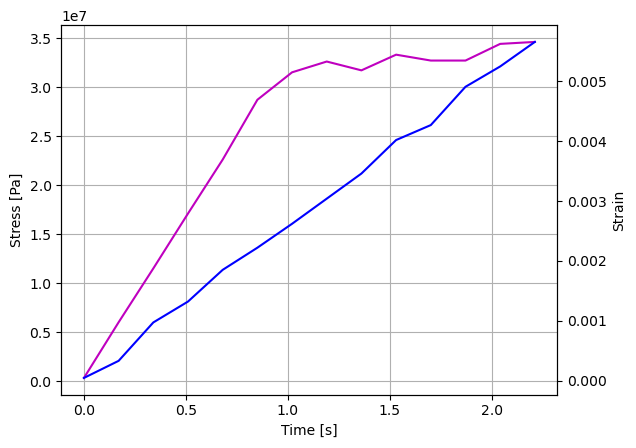

In [31]:
import matplotlib.pyplot as plt
plt.grid()
plt.xlabel("Time [s]")

plt.plot(data[:,0], data[:,1], 'm');
plt.ylabel("Stress [Pa]")

plt.twinx()
plt.plot(data[:,0], data[:,2], 'b');
plt.ylabel("Strain");

## 4 - Disk tree manipulation: the **os** module

The `os` module contain many functions dedicated to manipulate files and
directories (also called folders). <br>
In the table below _path_ is a string giving the (relative or absolute) path of a file or directory:<br/>
|Function         |Header|
|-----------------       |------|
|os.getcwd()             |returns the absolute path of the current working directory|
|os.chdir(_path_)        |makes _path_ the new working directory|
|os.path.exists(_path_)  |returns `True` if file (or dir) _paths_ exists, else `False`.|
|os.mkdir(_path_)        |creates the directory _path_|
|os.listdir(_path_)      |returns the list of files and directories that are in _path_|
|os.path.isdir(_path_)   |test if _path_ exists and is a directory|
|os.path.isfile(_path_)  |test if _path_ exists and is a file|
|os.path.basename()      |returns the name of the file or directory _path_ without the acces path|
|os.path.dirname()       |return the access path of _path_|
|os.path.split()         |returns the tuple (os.dirname(_path_), os.basename(_path_))|
|os.path.join(_p1_, _p2_)|concatenates _p1_ and _p2_ using the operating system path separator|

**Helpful Notes**:
- the `/` character can be used as a directory name separator for any operating system,
- the current directory can be designated by the shortcut `.`, the parent directory by the shortcut `..`.

See the examples below showing some usage of the `os` module:

In [32]:
import os

<br>The **current working directory** (cwd):

In [33]:
os.getcwd()

'/home/jlc/work/IA-MachineLearning/03-ENSPIMA/2025-2026/Notebooks/solutions'

<br>The content of the current working directory:

In [34]:
os.listdir('.')

['data',
 'img',
 'sol_ML2_DNN_part1.ipynb',
 'sol_2-Wake_up_your_Python-2.ipynb',
 'sol_1-Wake_up_your_Python-1.ipynb',
 '.ipynb_checkpoints',
 'sol_ML1_MNIST.ipynb']

In [35]:
os.listdir()     # the default is the cwd...

['data',
 'img',
 'sol_ML2_DNN_part1.ipynb',
 'sol_2-Wake_up_your_Python-2.ipynb',
 'sol_1-Wake_up_your_Python-1.ipynb',
 '.ipynb_checkpoints',
 'sol_ML1_MNIST.ipynb']

<br>The content of the parent directory:

In [36]:
os.listdir('..')

['ML2_DNN_part1.ipynb',
 'utils',
 'data',
 'img',
 '1-Wake_up_your_Python-1.ipynb',
 'ML2_DNN_part2.ipynb',
 '.ipynb_checkpoints',
 'solutions',
 'ML1_MNIST.ipynb']

<br>The content of the directory `./data`:

In [37]:
os.listdir('data')

['directory1',
 'pinglinux.png',
 'accents.txt',
 'data.txt',
 'directory2',
 'plotCurves.py',
 '.ipynb_checkpoints',
 'plotCurves.png']

<br> Using `os.path.is<something>`:

In [38]:
os.path.isfile('data/data.txt')

True

In [39]:
os.path.isdir('data/data.txt')

False

In [40]:
os.path.isdir('data/directory1')

True

In [41]:
os.path.exists('data/data.txt')

True

In [42]:
os.path.exists('data/directory1/')

True

<div class="alert alert-block alert-info">
<span style="color: #0000BB;font-weight: bold; font-size:large;">Exercise 4.1 $–$ Sorting files/directories</span>
<span style="color: #0000BB">
    
- Display the absolute name of the current directory with `os.gecwd()`.
- Define and display `F`, the list comprehension of **files** and `D`, the list comprehension of directories contained in the directory <tt><b><span style="color:blue">sources</span></b></tt>.
</span></div>

In [43]:
os.getcwd()

'/home/jlc/work/IA-MachineLearning/03-ENSPIMA/2025-2026/Notebooks/solutions'

In [44]:
F = [f for f in os.listdir('data') if os.path.isfile(os.path.join('data', f))]
print("Files:", F)

Files: ['pinglinux.png', 'accents.txt', 'data.txt', 'plotCurves.py', 'plotCurves.png']


In [45]:
D = [d for d in os.listdir('data') if os.path.isdir(os.path.join('data', d))]
print("Directories:", D)

Directories: ['directory1', 'directory2', '.ipynb_checkpoints']


<div class="alert alert-block alert-info">
<span style="color: #0000BB;font-weight: bold; font-size:large;">Exercise 4.2 $–$ Full content of a directory with `os.walk`</span>
<span style="color: #0000BB">
    
- Observe the elements contained in the `os.walk('data')` in the cell bellow.
    
- Deduce a way to get the list of paths of the files contained in the directory `data`and all of its subdirectories.
</span></div>

In [46]:
for dirs, sdirs, files in os.walk("data") :
    print("\nDirectory:",dirs)
    print("sub-directory:",sdirs)
    print("files        :",files)


Directory: data
sub-directory: ['directory1', 'directory2', '.ipynb_checkpoints']
files        : ['pinglinux.png', 'accents.txt', 'data.txt', 'plotCurves.py', 'plotCurves.png']

Directory: data/directory1
sub-directory: ['Data', 'Images']
files        : []

Directory: data/directory1/Data
sub-directory: []
files        : ['data1.txt', 'data3.txt', 'data2.txt']

Directory: data/directory1/Images
sub-directory: []
files        : ['python-41.png', 'snake.png', 'pinglinux.png', 'CC-BY-SA.jpeg', 'slicing.png', 'traceCourbes.png', 'python-42.png']

Directory: data/directory2
sub-directory: []
files        : ['TensileData-20.xlsx', 'test0.xlsx', 'test2.xlsx', 'test1.xlsx']

Directory: data/.ipynb_checkpoints
sub-directory: []
files        : []


In [47]:
paths = []
for dirs, sdirs, files in os.walk("data") :
    paths.extend([os.path.join(dirs, file) for file in files])
paths

['data/pinglinux.png',
 'data/accents.txt',
 'data/data.txt',
 'data/plotCurves.py',
 'data/plotCurves.png',
 'data/directory1/Data/data1.txt',
 'data/directory1/Data/data3.txt',
 'data/directory1/Data/data2.txt',
 'data/directory1/Images/python-41.png',
 'data/directory1/Images/snake.png',
 'data/directory1/Images/pinglinux.png',
 'data/directory1/Images/CC-BY-SA.jpeg',
 'data/directory1/Images/slicing.png',
 'data/directory1/Images/traceCourbes.png',
 'data/directory1/Images/python-42.png',
 'data/directory2/TensileData-20.xlsx',
 'data/directory2/test0.xlsx',
 'data/directory2/test2.xlsx',
 'data/directory2/test1.xlsx']

## 5 - Reading image files

There are several modules that allow you to read a **file
image in PNG** format and retrieve an array `T (nL × nC × 4)` of type
`numpy.ndarray`.<br>

The `T[i,j]` element of the `T` array is a pixel defined by 4 integers Red, Green,
Blue, Alpha (opacity).<br>

The **imread** function of the **imageio** module returns an array of integers between
0 and 255 which corresponds to the “true” image encoding,
while the **imread** function of the **matplotlib.pyplot** returns an array of floats between 0 and 1.<br>

To display an the array of an image, you can use the **matplotlib.pyplot.imshow** function.

<div class="alert alert-block alert-info">
<span style="color: #0000BB;font-weight: bold; font-size:large;">Exercise 5.1 $–$ Reading and simple image manipulation</span>
<span style="color: #0000BB">
    
- Using the **imread** functions from **imageio.v2** and from **matplotlib.pyplot**, create the arrays `AI` of integers and `AF` of floats by
reading the same image <tt><b><span style="color:blue">pinglinux.png</span></b></tt> located in the directory
<tt><b><span style="color:blue">sources</span></b></tt>.

- Display the attributes `shape` and `dtype` of `AI` and `AF`.

</span></div>

In [61]:
from imageio.v2 import imread
AI = imread("data/pinglinux.png")

In [62]:
import matplotlib.pyplot as plt
AF = plt.imread("data/pinglinux.png")

- Visual checking:

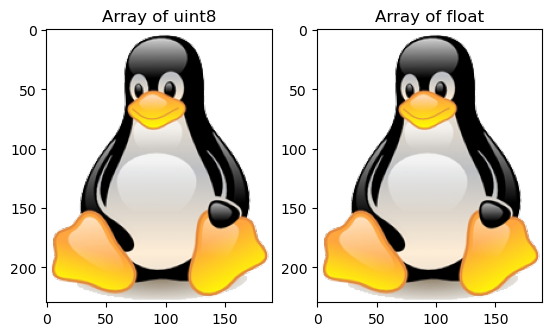

In [65]:
fig, axes = plt.subplots(1,2)  # two graphs
ax1, ax2 = axes
ax1.set_title("Array of uint8")
ax1.imshow(AI)
ax2.set_title("Array of float")
ax2.imshow(AF);

- Observe and explain the images bellow corresponding to `TI[::-1,:,:]`, `TI[:,::-1,:]` and `TI[:,:,;::-1]` :

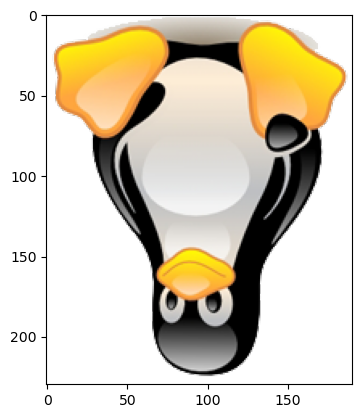

In [66]:
plt.imshow(AI[::-1,:,:])

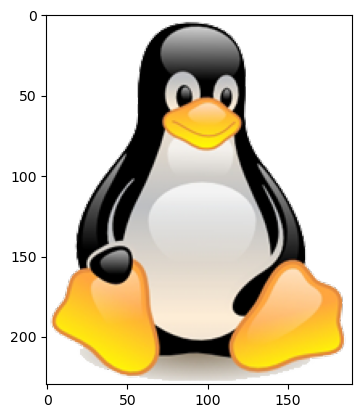

In [67]:
plt.imshow(AI[:,::-1,:])

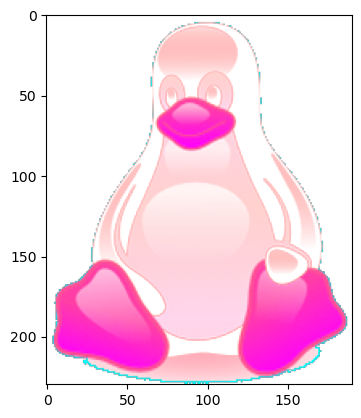

In [68]:
plt.imshow(AI[:,:,::-1])

## 6 - Drawing curves with **matplolib** module

The **matplotlib.pyplot** module allows you to plot 2D, 3D and other curves.... see the gallery on the site [matplotlib.org/gallery.html](https://matplotlib.org/ gallery.html).

**Tutorials**:<br>
- on the matplotlib site: https://matplotlib.org/stable/ <br />
- at the LABRI laboratory: http://www.labri.fr/perso/nrougier/teaching/matplotlib/ <br>

Typical example of a **matplotlib** plot:

In [69]:
# Data to be plotted
# Left graph: representative curves
X = np.linspace(0,10,500) # Vector of values for abscissas
Y1 = 10*np.exp(-(X-8)**2)
Y2 = np.cos(3*np.pi*X)*np.exp(-X/2)
# Right graph: parametric curves
A = np.linspace(0, np.pi, 300) # Vector of values for parameters
Vx = (np.sin(5*A)-3*np.cos(A))*np.cos(A)
Vy = (np.sin(5*A)-3*np.cos(A))*np.sin(A)

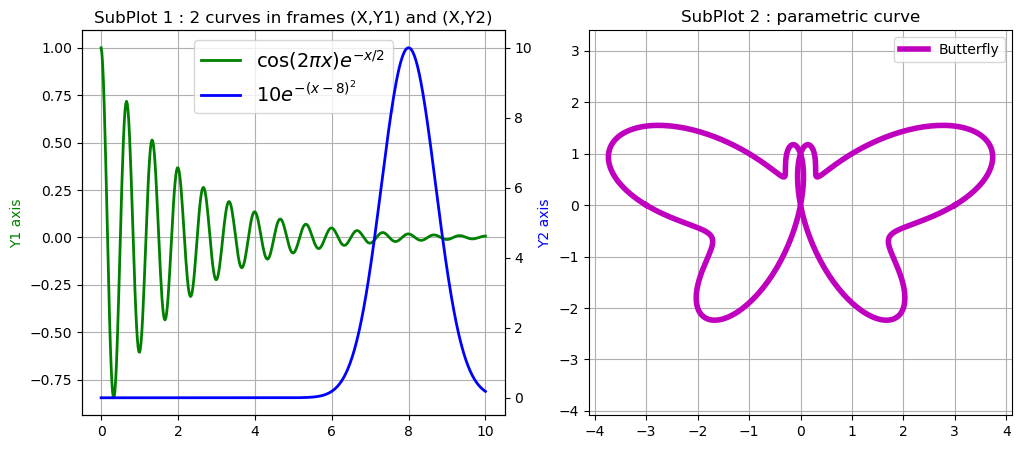

In [71]:
fig, (ax1, ax2) = plt.subplots(1,2)  # 1 row 2 colums
fig.set_size_inches(12,5)

# ax1 -> the left side drawing
ax1.set_title("SubPlot 1 : 2 curves in frames (X,Y1) and (X,Y2)")

# 1 - Curve in the frame (X,Y1)
ax1.set_ylabel("Y1 axis", color="g")
p1 = ax1.plot(X, Y2, "g-", linewidth=2, label=r"$\cos(2\pi x)e^{-x/2}$")
ax1.grid()

# 2 - second frame (X,Y2):
ax1t = ax1.twinx()
p2 = ax1t.plot(X, Y1, "b-", linewidth=2, label="$10e^{-(x - 8)^2}$")
ax1t.set_xlabel("x (common abcissa)")
ax1t.set_ylabel("Y2 axis", color="b")

# 3- a legend box
p12 = p1+p2
labels = [L.get_label() for L in p12]
ax1.legend(p12, labels, loc="upper center", fontsize=14)

# ax2 -> the right side drawing
ax2.set_title("SubPlot 2 : parametric curve")
ax2.plot( Vx, Vy, "m-", linewidth=4)
ax2.plot(-Vx, Vy, "m-", linewidth=4, label="Butterfly")
ax2.axis("equal");
ax2.legend()
ax2.grid()

plt.savefig("curves.png") # Saving the figure in a .png file
#plt.show() # Useless in a notebook but essential in a .py program